Import module and sub modules 

In [20]:
%matplotlib inline

In [21]:
import numpy as np
import autograd 

#import blocks for trig functions
import autograd.blocks.trigo as trig

#import blocks for exp function
import autograd.blocks.expo as expo

#import variable objects
import autograd.variable as av 

Example 1: `f(x) = sin(x) + cos(x)` for x = 0

In [22]:
#Set the x variable
x = av.Variable(0)

In [23]:
#perform first operation

#instantiate the sin block 
sin = trig.sin()

#pass the value through the sin block
b1 = sin(x)

#if you are only going to perform this function once, 
#you can combind the two operation 
#b1 = trig.sin()(x)

In [24]:
#perform the second operation
b2 = trig.cos()(x)

In [25]:
#perform the final operation 
b3 = b1 + b2

In [26]:
#return data 
print(b3.data)

[1.]


In [27]:
#return gradient 
print(b3.gradient)

[[1.]]


Create a function to compute the derivative across a range of values

In [28]:
#instantiate blocks outside of function
sin = trig.sin()
cos = trig.cos()
def function(x):
    x1 = av.Variable(x)
    b1 = sin(x1)
    b2 = cos(x1)
    b3 = b1 + b2
    return(b3.data,b3.gradient)

In [29]:
value = list()
data = list()
gradient = list()
for i in np.linspace(-2 * np.pi, 2 * np.pi):
    value.append(i)
    output = function(i)
    data.append(output[0])
    gradient.append(output[1][0])

Let's plot the values

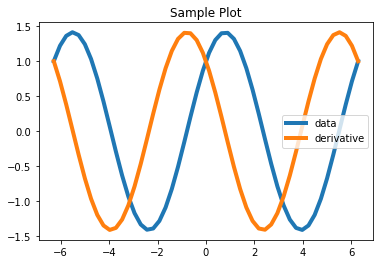

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('lines', linewidth=4, color='g')
plt.plot(value,data,label='data')
plt.plot(value,gradient,label='derivative')
plt.title("Sample Plot")
plt.legend()
plt.show()

Example 2: Create a function to evaluate at multiple values
`f(x) = sin(x + 3)*cos(x/2) + e^-x`

In [31]:
sin = trig.sin()
cos = trig.cos()
exp = expo.exp()
def function(x):
    x1=av.Variable(x)
    #elementary operations such as + - / * 
    #can be performed within other blocks
    b1 = sin(x1 + 3)
    b2 = x1 / 2
    b3 = cos(b2)
    b4 = b1/b3
    b5 = exp(-x1) 
    b7 = b4 + b5
    return(b7.data,b7.gradient)

In [32]:
value = list()
data = list()
gradient = list()
for i in np.linspace(-2 * np.pi, 2 * np.pi):
    value.append(i)
    output = function(i)
    data.append(output[0][0])
    gradient.append(output[1][0])

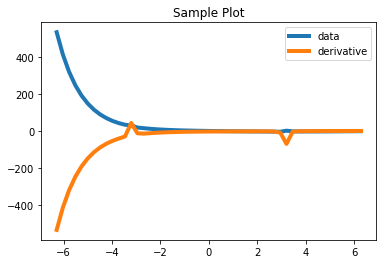

In [33]:
plt.plot(value,data,label='data')
plt.plot(value,gradient,label='derivative')
plt.title("Sample Plot")
plt.legend()
plt.show()

Example 3, using the vector framework with `f(x,y)=cos(3*(x+y)) * exp(-(x**2 + y**2))`


In [51]:
from autograd.blocks.operations import sum_elts 

sum_block=sum_elts()

def vector_function(x,y):
    x1=av.Variable([x,y])
    
    
    b1 = exp(-sum_block(pow(x1,2)))
    b2 = cos(3*sum_block(x1))
    b3 = b1*b2
    
    return(b3.data,b3.gradient)
    
def data_function(x,y):
    data, grad= vector_function(x,y)
    return(data)


In [48]:
vector_function(1,2)

(array([-0.00613915]), array([[0.0039478 , 0.01622609]]))

In [56]:
x=np.linspace(-2,2,100)
y=np.linspace(-2,2,100)

X,Y=np.meshgrid(x,y)

vf=np.vectorize(data_function)

Z=vf(X,Y)

In [54]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

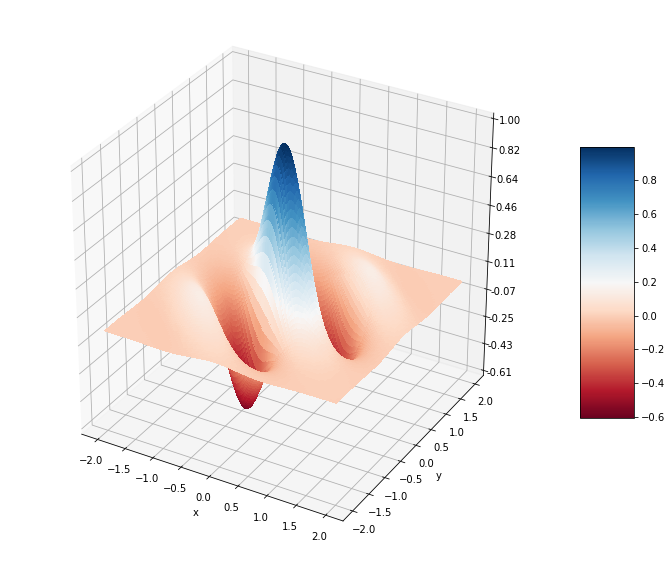

In [60]:

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel('x')
plt.ylabel('y')
plt.

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()